<a href="https://colab.research.google.com/github/KhosrojerdiA/NLP/blob/main/WordVectors_Glove_from_Genism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

#Imports

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

In [ ]:
gensim.__version__

'4.3.2'

In [ ]:
np.random.seed(42)

In [ ]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


#Glove

In [ ]:
wv = api.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

#Check Embedding of apple

In [ ]:
wv['apple']

array([ 5.1418e-01, -1.9196e-01, -7.9963e-01,  9.1339e-01, -5.7061e-01,
        7.1746e-01, -5.8979e-01, -5.1530e-01,  1.3453e+00, -2.0792e-01,
        4.4555e-01,  2.4981e-01, -3.2020e+00,  3.5736e-01, -2.3593e-02,
       -3.1158e-02,  3.7782e-01,  6.4447e-01,  1.2056e+00, -1.0553e-01,
       -8.9697e-01, -7.9754e-01,  2.0239e-01, -1.0664e+00, -4.7167e-01,
       -2.5953e-01,  1.1328e-01, -3.8142e-01,  2.0366e-03, -5.0261e-01,
       -2.5197e-01, -8.4033e-02, -1.0015e+00, -8.6835e-01,  6.6201e-01,
        2.6496e-01,  2.2570e-01, -3.3847e-01, -3.4739e-01,  6.2199e-01,
       -1.3491e+00, -1.7497e-01, -1.1490e+00,  1.5144e-01,  1.1255e+00,
       -6.2668e-01, -3.4274e-01, -3.4938e-01, -1.0806e+00,  6.0174e-01],
      dtype=float32)

#Length of embedding of apple

In [ ]:
len(wv['apple'])

50

#Similarity

In [ ]:
wv.similarity("apple", "mango")

0.5289788

In [ ]:
wv.similarity("apple", "car")

0.51229525

In [ ]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.48
'car'	'bicycle'	0.62
'car'	'airplane'	0.67
'car'	'cereal'	0.38
'car'	'communism'	0.01


#Semantic

In [ ]:
wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('prince', 0.759779691696167),
 ('stone', 0.7595877051353455),
 ('queen', 0.754626989364624)]

#Dimensionality Reduction
with PCA

In [ ]:
words = ["one",'two','man','woman','table']
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[-0.28042245,  1.5896969 ],
       [ 0.59239805,  1.983121  ],
       [-2.5777643 , -1.6972471 ],
       [-1.0547673 , -0.2568552 ],
       [ 3.320554  , -1.6187161 ]], dtype=float32)

##Visualize the words

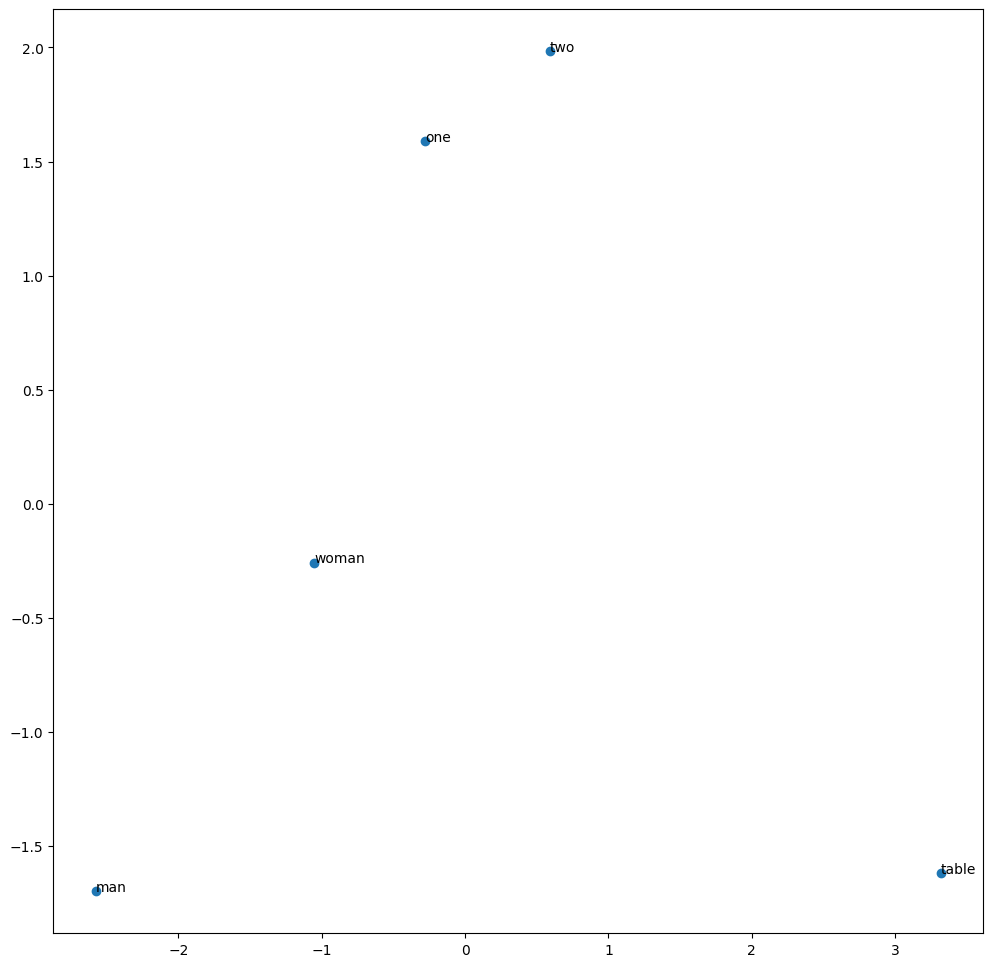

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()